<a href="https://colab.research.google.com/github/YunHo0325/ai_lecture/blob/main/src/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Packages Import

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

# 1. 데이터셋 불러오기

In [4]:
# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# 2. 데이터 전처리

In [5]:
# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.3, 
                                                  random_state=2020)

# 3. 모델링

## 3.1 DNN

In [10]:
def dnnModel():
    # 모델 구성
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ])
    return model

In [ ]:
tf.keras.backend.clear_session()    # 세션 초기화
model = dnnModel()

# 모델 컴파일
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

In [17]:
# 모델 훈련
history = model.fit(x_train, y_train, 
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
1313/1313 [==============================] - 61s 5ms/step - loss: 0.2354 - accuracy: 0.9324 - val_loss: 0.1353 - val_accuracy: 0.9603
Epoch 2/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9695 - val_loss: 0.0931 - val_accuracy: 0.9720
Epoch 3/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0935 - val_accuracy: 0.9713
Epoch 4/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 5/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0897 - val_accuracy: 0.9751
Epoch 6/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0798 - val_accuracy: 0.9781
Epoch 7/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0895 - val_accuracy

In [18]:
# 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1376 - accuracy: 0.9757
테스트 정확도: 0.9757000207901001


In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
loss, acc, val_loss, val_acc  = history.history.values()

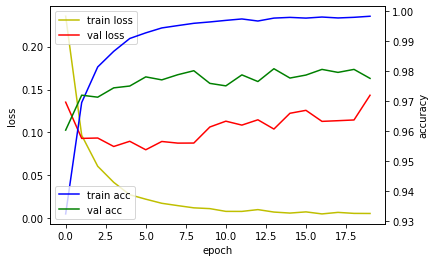

In [51]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [54]:
def showAccPlot(hist):
    loss, acc, val_loss, val_acc = hist.values()
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(loss, 'y', label='train loss')
    loss_ax.plot(val_loss, 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(acc, 'b', label='train acc')
    acc_ax.plot(val_acc, 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='lower left')

    plt.show()

### 3.1.2 One-Hot Encoding

In [41]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_val_oh = tf.keras.utils.to_categorical(y_val)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [42]:
tf.keras.backend.clear_session()    # 세션 초기화
model = dnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train_oh, 
                    epochs=20,
                    validation_data=(x_val, y_val_oh))

Epoch 1/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2341 - accuracy: 0.9315 - val_loss: 0.1347 - val_accuracy: 0.9598
Epoch 2/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.1013 - val_accuracy: 0.9692
Epoch 3/20
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0859 - val_accuracy: 0.9740
Epoch 4/20
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0977 - val_accuracy: 0.9722
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.1161 - val_accuracy: 0.9684
Epoch 6/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0873 - val_accuracy: 0.9763
Epoch 7/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0855 - val_accuracy:

In [46]:
# 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9805
테스트 정확도: 0.9804999828338623


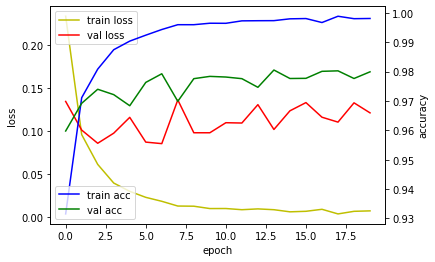

In [55]:
showAccPlot(history.history)

## 3.2 CNN

In [67]:
def cnnModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [68]:
tf.keras.backend.clear_session()    # 세션 초기화
model = cnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [69]:
# 모델 훈련
history = model.fit(x_train, y_train_oh, 
                    epochs=20,
                    validation_data=(x_val, y_val_oh))

Epoch 1/20
1313/1313 [==============================] - 20s 10ms/step - loss: 0.1716 - accuracy: 0.9459 - val_loss: 0.0548 - val_accuracy: 0.9831
Epoch 2/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0654 - accuracy: 0.9797 - val_loss: 0.0469 - val_accuracy: 0.9864
Epoch 3/20
1313/1313 [==============================] - 12s 10ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 4/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 5/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0431 - val_accuracy: 0.9882
Epoch 6/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0395 - val_accuracy: 0.9884
Epoch 7/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0339 - 

In [70]:
# 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0498 - accuracy: 0.9915
테스트 정확도: 0.9915000200271606


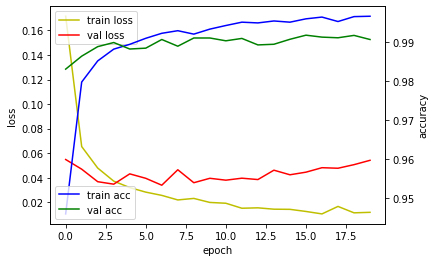

In [71]:
showAccPlot(history.history)

In [73]:
model.save("drive/MyDrive/mnist_cnn_epoch20.model")

INFO:tensorflow:Assets written to: drive/MyDrive/mnist_cnn_epoch20.model/assets
